# **Assignment 2**

Possible points: 100

Rename the .ipynb notebook as `Assignment_2_{FirstName}_{LastName}.ipynb` before submitting your notebook. Eg. Assignment_2_Zhengjun_An.ipynb

Submit the .ipynb notebook only. There is no need to submit the data file and any other write up. All your code, and answers should be included in the notebook.

Use the dataset `mall-customers.csv` to answer the questions in Part A.

Use the dataset `housing-price.csv` to answer the questions in Part B.

*Please provide the following information:*

* Name:

* Comet ID:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
print("Current time:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Current time: 2026-02-18 14:21:21


# **Part A: Supermarket Customer Segmentation**

Use the dataset `mall-customers.csv` to answer the questions in Part A.

**Context:** Imagine your company own a supermarket and has collected basic customer data through membership cards. As a marketing analyst, your goal is to identify **target customers** to provide insights for the marketing team and develop effective strategies.  

The data includes:
- **CustomerID**
- **Age**
- **Gender**
- **Annual Income (k$)**
- **Spending Score (1-100)** (a metric based on customer behavior and purchasing data)

## 1) Import the data.

### 1.1) [1 points] Load the dataset.

In [2]:
# Load part A dataset
mall_data = pd.read_csv('supermarket-customers.csv', index_col='CustomerID')
mall_data.head()

,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
1,Male,19,15.0,39
2,Male,21,15.0,81
3,Female,20,16.0,6
4,Female,23,16.0,77
5,Female,31,17.0,40


### 1.2) [2 points] Basic overview of the dataset.

* *Note: The basic overview includes checking the dataset's: `shape`, `data types`, and `descriptive statistics` to understand its structure and key characteristics.*

In [3]:
mall_data.shape

(201, 4)

In [4]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 201
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          200 non-null    object 
 1   Age             201 non-null    int64  
 2   Annual Income   199 non-null    float64
 3   Spending Score  201 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [5]:
mall_data.describe()

,Age,Annual Income,Spending Score
count,201.000000,199.000000,201.000000
mean,41.412935,60.457286,50.019900
std,39.235872,26.409497,25.885123
min,18.000000,15.000000,1.000000
25%,29.000000,40.000000,34.000000
50%,36.000000,62.000000,50.000000
75%,49.000000,78.000000,73.000000
max,559.000000,137.000000,99.000000


### 1.3) [1 points] Identify numerical and categorical columns for future use.

Please answer the question: Should `CustomerID` be treated as a numerical column? Why or why not?

If not, what should we do at the beginning when loading the dataset?

In [6]:
mall_num_col = mall_data.select_dtypes(include=np.number).columns.to_list()
print("Numerical Columns:")
print(mall_num_col)

mall_cat_col = mall_data.select_dtypes(include='object').columns.to_list()
print("\nCategorical Columns:")
print(mall_cat_col)

Numerical Columns:
['Age', 'Annual Income', 'Spending Score']

Categorical Columns:
['Gender']


CustomerID should not be treated as a numerical column because it is an identifier with no mathematical or ordinal meaning. It is better to set it as the index when loading the dataset or convert it to a string to avoid confusion.

## 2) Clean the data.

### 2.1) [2 points] Remove the duplicate rows (if exist).

* *Note: After removing duplicateste, make sure to output the dataset's shape again.*

In [7]:
# Show all duplicate records (including the first occurrence)
mall_duplicate_records = mall_data[mall_data.duplicated(keep=False)]
print(f"Number of duplicate records (including all occurrences): {mall_duplicate_records.shape[0]}")
mall_duplicate_records

Number of duplicate records (including all occurrences): 2


,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
25,Female,54,28.0,14
201,Female,54,28.0,14


In [8]:
# Remove duplicates
mall_data = mall_data.drop_duplicates()
print(f"Shape of the dataset after removing duplicates: {mall_data.shape}")

Shape of the dataset after removing duplicates: (200, 4)


### 2.2) [2 points] Handle missing values (if exist).

In [9]:
# Check for missing values
mall_data.isnull().sum()

Gender            1
Age               0
Annual Income     2
Spending Score    0
dtype: int64

In [10]:
# Replace missing values with the mean for numerical columns
for col in mall_num_col:
    if mall_data[col].isnull().sum() > 0:
        mean_value = mall_data[col].mean()
        mall_data[col] = mall_data[col].fillna(mean_value)

# Replace missing values with the mode for categorical columns
for col in mall_cat_col:
    if mall_data[col].isnull().sum() > 0:
        mode_value = mall_data[col].mode()[0]
        mall_data[col] = mall_data[col].fillna(mode_value)

In [11]:
# Check for missing values again
mall_data.isnull().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

### 2.3) [2 points] Handle extreme values (if exist).

* *Note: After handling outliers, make sure to output the dataset's shape again.*

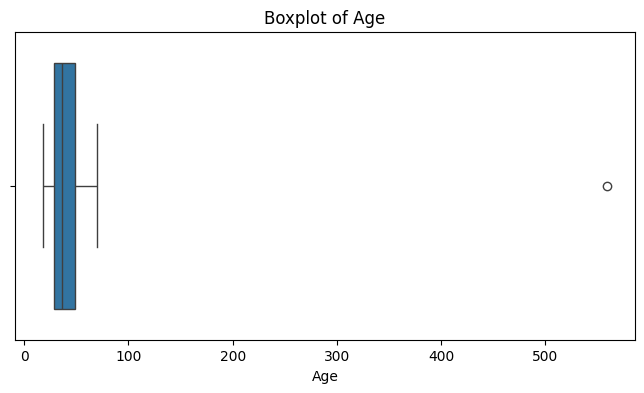

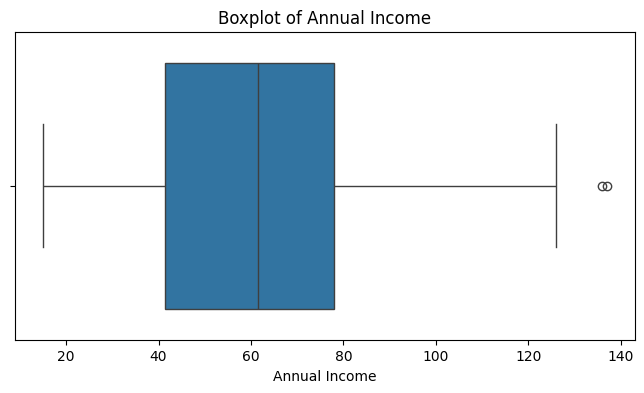

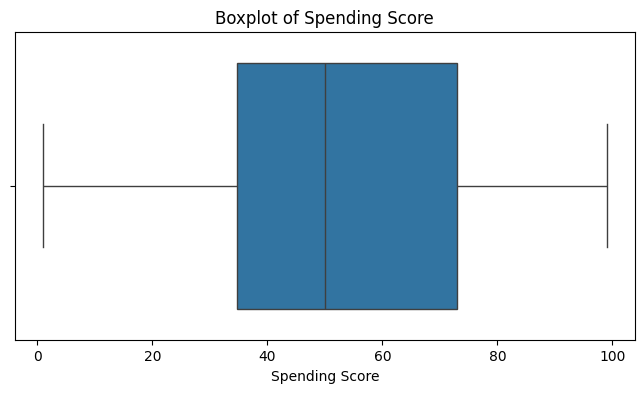

In [12]:
# Check for extremes for numerical columns using boxplots/IQR method
for col in mall_num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=mall_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [13]:
# Remove outliers of the 'Age' column using the IQR method
Age_Q1 = mall_data['Age'].quantile(0.25)
Age_Q3 = mall_data['Age'].quantile(0.75)
Age_IQR = Age_Q3 - Age_Q1
lower_bound = Age_Q1 - 1.5 * Age_IQR
upper_bound = Age_Q3 + 1.5 * Age_IQR
mall_data = mall_data[(mall_data['Age'] >= lower_bound) & (mall_data['Age'] <= upper_bound)]
print(f"Shape of the dataset after removing outliers from 'Age': {mall_data.shape}")

Shape of the dataset after removing outliers from 'Age': (199, 4)


## 3) Perform deeper exploratory data analysis (EDA).

### 3.1) [5 points] Univariate Analysis.

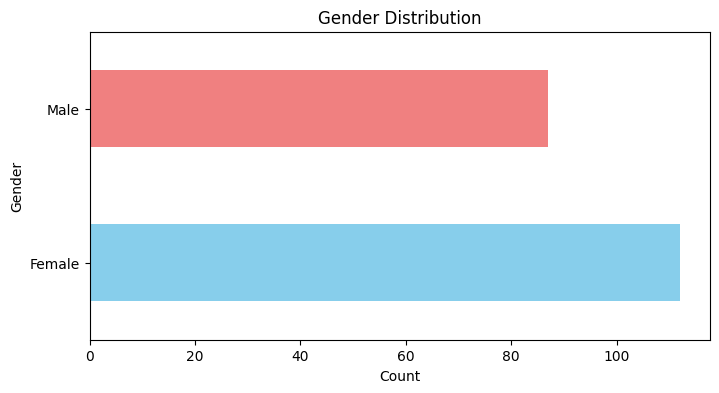

In [14]:
# Check the distribution of Categorical variables
gender_counts = mall_data['Gender'].value_counts()
plt.figure(figsize=(8, 4))
gender_counts.plot(kind='barh', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

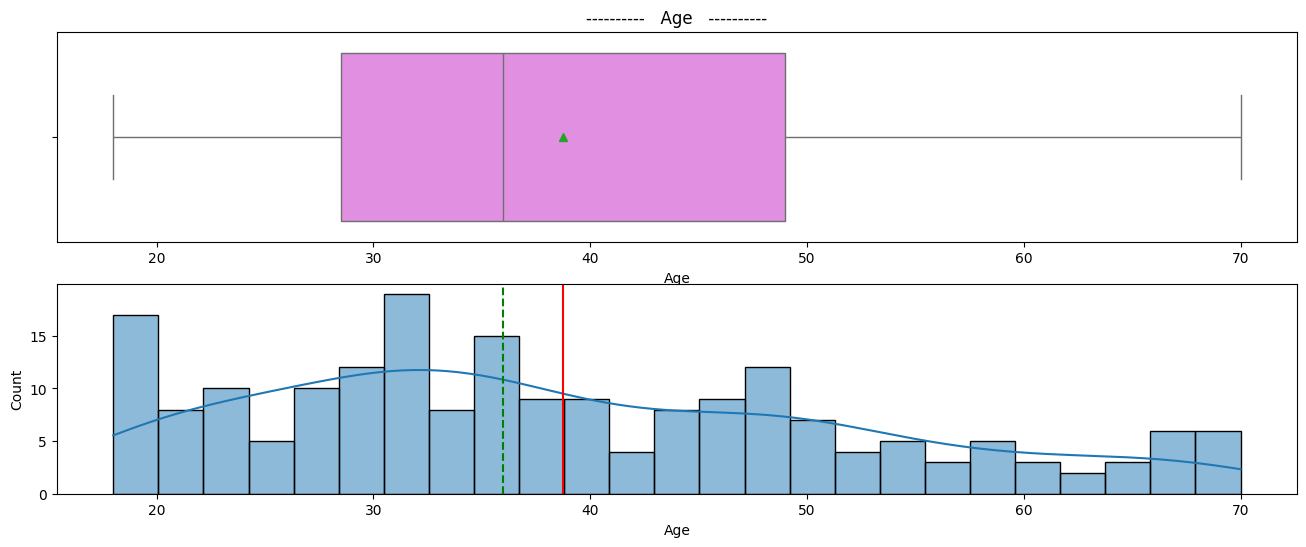

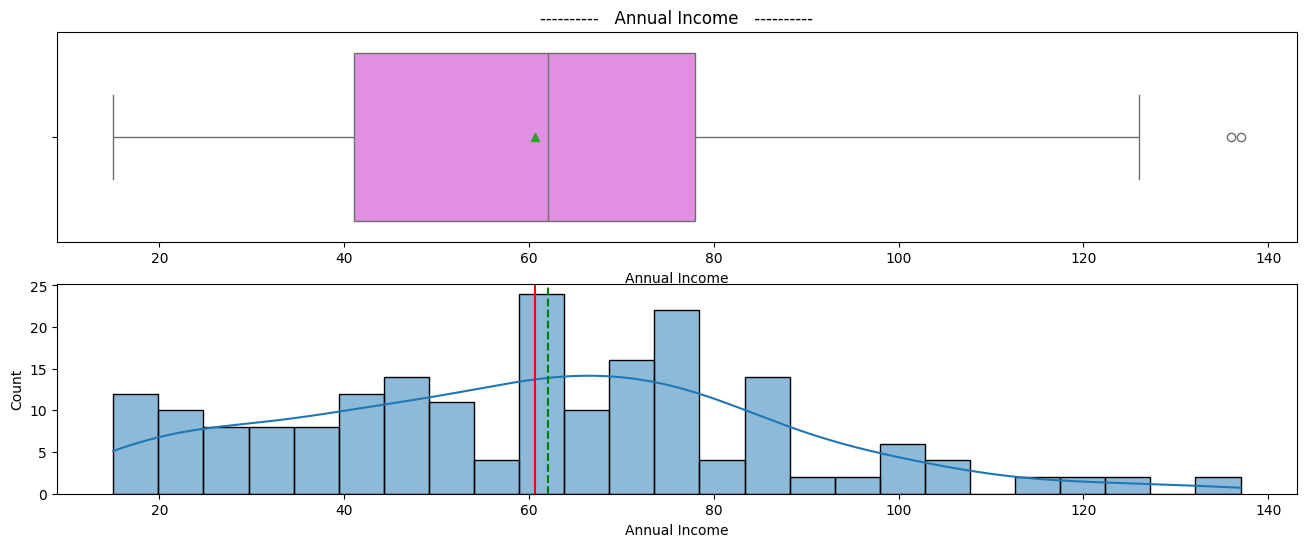

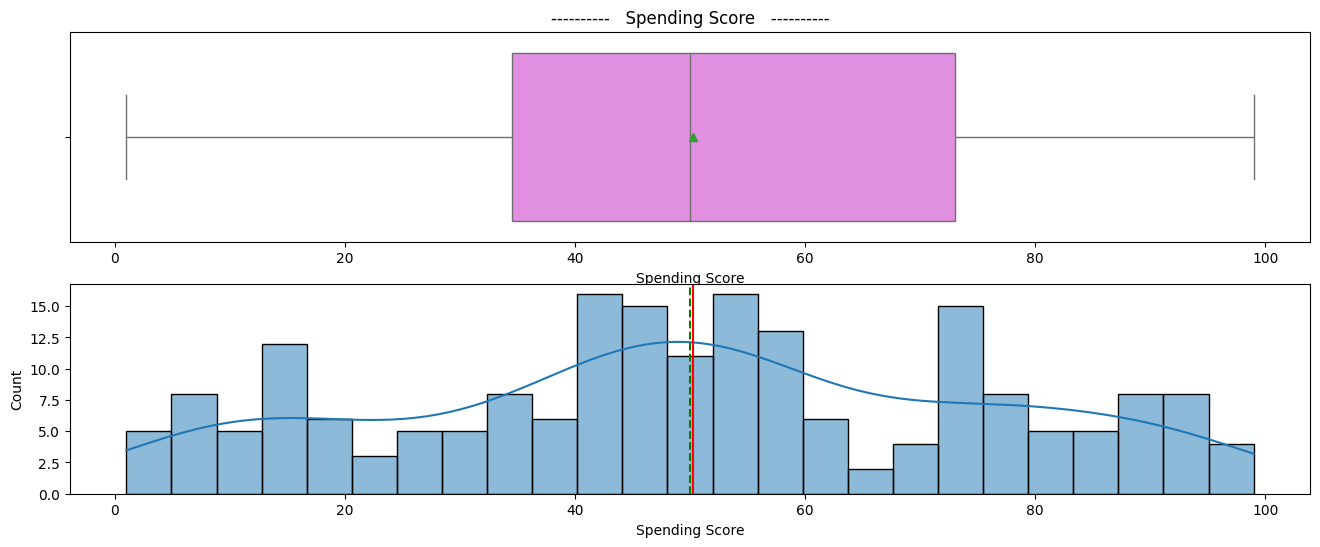

In [15]:
# Univariate Analysis: Boxplots and Histograms
for col in mall_num_col:
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    plt.title("----------   " + col + "   ----------")
    sns.boxplot(data=mall_data, x=col, showmeans=True, color="violet")
    plt.subplot(2, 1, 2)
    sns.histplot(data=mall_data, x=col, bins=25, kde=True)
    plt.axvline(mall_data[col].mean(), color="red", linestyle="-")
    plt.axvline(mall_data[col].median(), color="green", linestyle="--")
    plt.show()

### 3.2) [5 points] Bivariate Analysis.

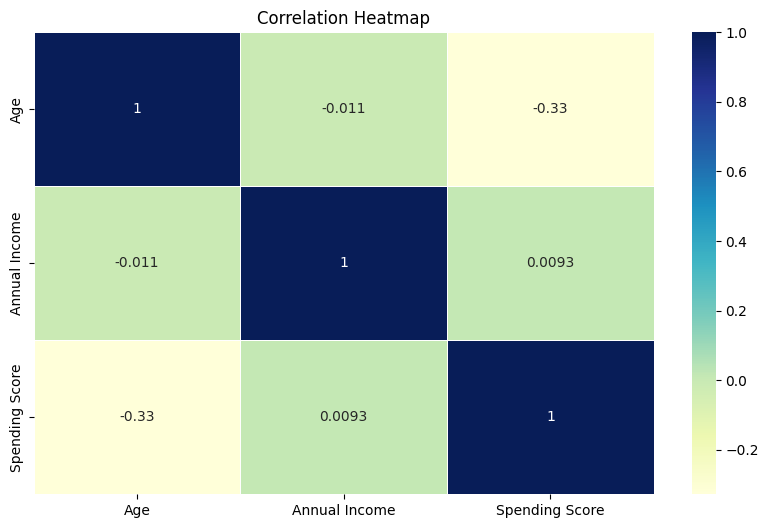

In [16]:
# Bivariate Analysis: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mall_data[mall_num_col].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

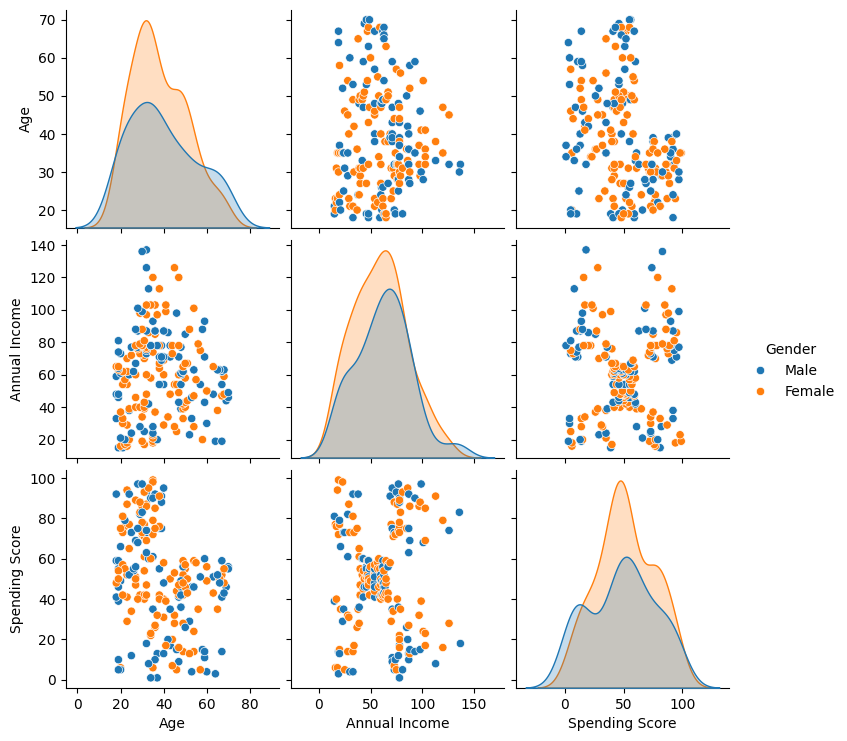

In [17]:
# Bivariate Analysis: Pairplot
# Add Gender as hue to pairplot to analyze across different genders
sns.pairplot(data=mall_data, vars=mall_num_col, hue="Gender", diag_kind="kde")

## 4) Perform K-Means Clustering using `Annual Income` and `Spending Score`.

### 4.0) [4 points] Do we need to scale the features before performing KMeans clustering? Why or why not? If scaling is needed, please apply appropriate scaling to numerical features.

* *Note: You may use `MinMaxScaler` or `StandardScaler` from sklearn.preprocessing.* 

* *Hint: If you do scaling, do not overwrite the original variables. Keep the raw data unchanged and create scaled features separately. Use the scaled features for clustering, and use the original feature and generated cluster labels for visualization and further interpretation.* 

Yes, scaling is necessary before performing KMeans clustering. KMeans uses Euclidean distance to assign points to clusters, so features with larger scales can dominate the clustering process. Scaling ensures all features contribute equally.

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical features using MinMax Scaling
scaler = MinMaxScaler()
for col in mall_num_col:
    mall_data[col + '_scaled'] = scaler.fit_transform(mall_data[[col]])

### 4.1) [4 points] Identify the appropriate number of clusters using the Silhouette score method. You are also asked to plot a line chart of silhouette scores vs the number of clusters.

* *Note: To ensure the results are reproducible, use **`random_state=42`** and **`n_init=10`** when applying clustering.*

In [19]:
# Choose: Annual Income and Spending Score for clustering
cluster_features_1 = mall_data[["Annual Income_scaled", "Spending Score_scaled"]]

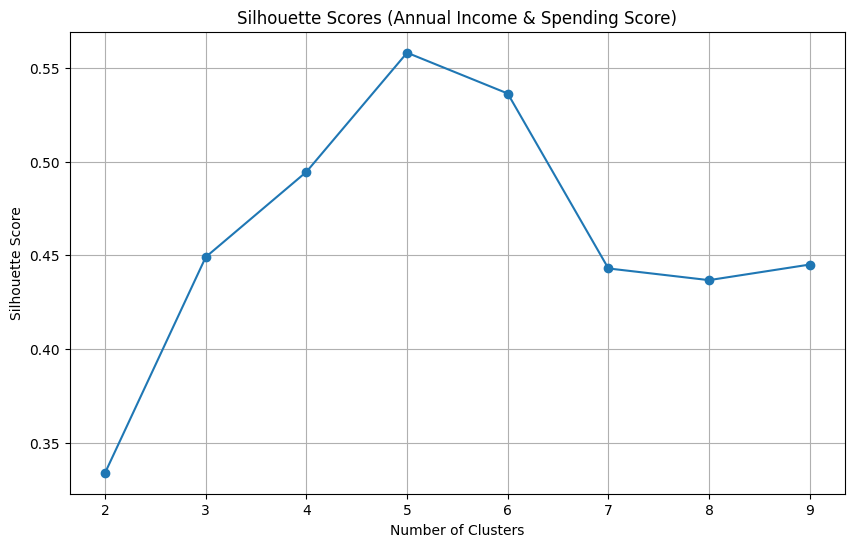

Best number of clusters: 5


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Identify the appropriate number of clusters using the Silhouette Score method
# Try different numbers of clusters and calculate the silhouette score
silhouette_scores_1 = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(cluster_features_1)
    silhouette_avg = silhouette_score(cluster_features_1, cluster_labels)
    silhouette_scores_1.append((n_clusters, silhouette_avg))

# Plot the silhouette scores vs the number of clusters
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in silhouette_scores_1], [x[1] for x in silhouette_scores_1], marker='o')
plt.title('Silhouette Scores (Annual Income & Spending Score)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid()
plt.show()

# Find the best number of clusters
best_n_clusters_1 = max(silhouette_scores_1, key=lambda x: x[1])[0]
print(f"Best number of clusters: {best_n_clusters_1}")

### 4.2) [4 points] Visualize the clusters.

* *Note: To ensure the results are reproducible, use **`random_state=42`** and **`n_init=10`** when applying clustering.*

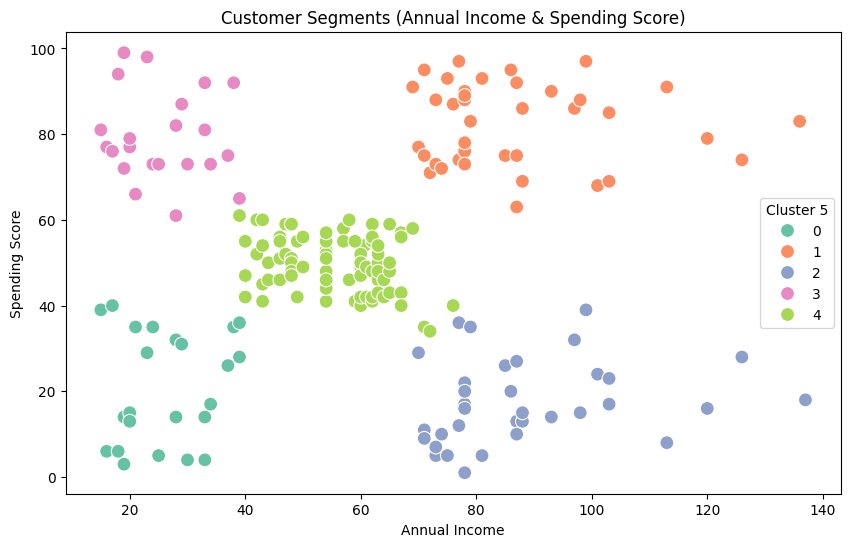

In [21]:
# Use the optimal number of clusters to perform KMeans clustering
kmeans_1 = KMeans(n_clusters=best_n_clusters_1, random_state=42, n_init=10)
mall_data['Cluster_1'] = kmeans_1.fit_predict(cluster_features_1)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_data, x="Annual Income", y="Spending Score", hue="Cluster_1", palette="Set2", s=100)
plt.title("Customer Segments (Annual Income & Spending Score)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title=f"Cluster {best_n_clusters_1}")
plt.show()

### 4.3) [5 points] Perform cluster profiling to interpret your finding. Based on your profiling, suggest appropriate business actions for each segment.

**Cluster 0: Low income & Low score**  
These customers have limited income and low spending behavior. They are likely price-sensitive and may respond well to discounts or budget-friendly options.

**Cluster 1: High income & High score**  
These customers have high income and high spending behavior. They are high-value customers who are ideal for premium products and personalized services. Focus on retaining them through exclusive offers and loyalty programs.

**Cluster 2: High income & Low score**  
These customers have high income but low spending behavior. They may require targeted marketing strategies, such as personalized recommendations or promotions, to encourage higher spending.

**Cluster 3: Low income & High score**  
These customers have low income but high spending behavior. They are likely loyal customers who prioritize spending despite limited income. Consider offering rewards or loyalty programs to maintain their engagement.

**Cluster 4: Moderate income & Moderate score** 
These customers are average in both income and spending behavior. They represent a stable customer group with balanced spending habits. Maintain current service quality and offer occasional promotions to keep them engaged.

## 5) Perform K-Means Clustering using `Age` and `Spending Score`.

### 5.1) [4 points] Identify the appropriate number of clusters using the Silhouette score method. You are also asked to plot a line chart of silhouette scores vs the number of clusters.

* *Note: To ensure the results are reproducible, use **`random_state=42`** and **`n_init=10`** when applying clustering.*

In [22]:
# Choose: Age and Spending Score for clustering
cluster_features_2 = mall_data[["Age_scaled", "Spending Score_scaled"]]

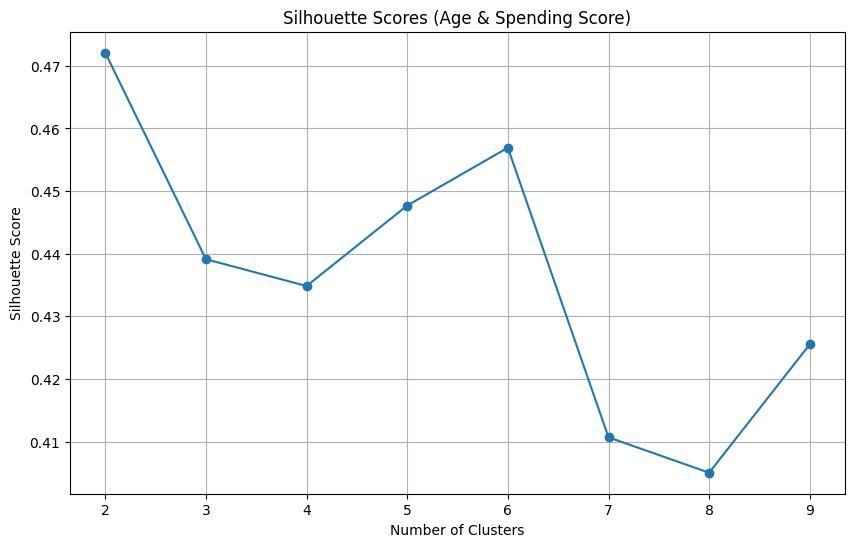

Best number of clusters: 2


In [23]:
# Identify the appropriate number of clusters using the Silhouette Score method
# Try different numbers of clusters and calculate the silhouette score
silhouette_scores_2 = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(cluster_features_2)
    silhouette_avg = silhouette_score(cluster_features_2, cluster_labels)
    silhouette_scores_2.append((n_clusters, silhouette_avg))

# Plot the silhouette scores vs the number of clusters
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in silhouette_scores_2], [x[1] for x in silhouette_scores_2], marker='o')
plt.title('Silhouette Scores (Age & Spending Score)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid()
plt.show()

# Find the best number of clusters
best_n_clusters_2 = max(silhouette_scores_2, key=lambda x: x[1])[0]
print(f"Best number of clusters: {best_n_clusters_2}")

### 5.2) [4 points] Visualize the clusters.

* *Note: To ensure the results are reproducible, use **`random_state=42`** and **`n_init=10`** when applying clustering.*

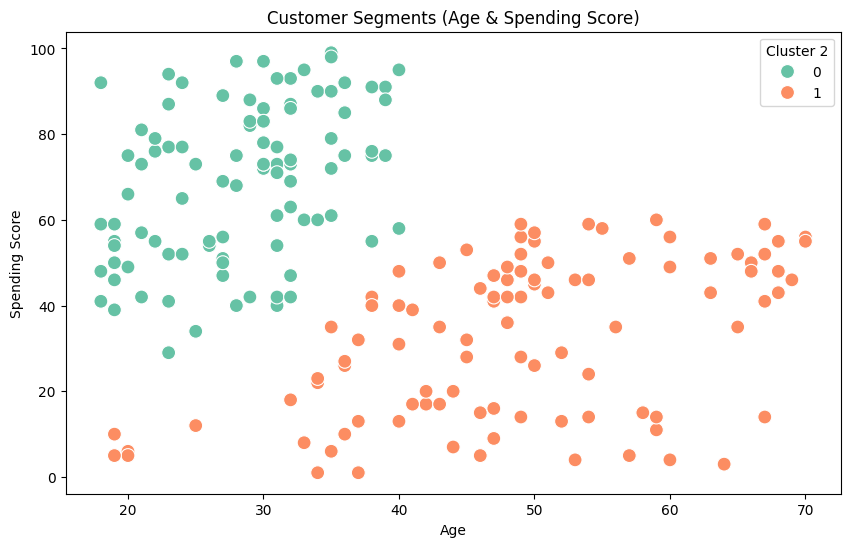

In [24]:
# Use the optimal number of clusters to perform KMeans clustering
kmeans_2 = KMeans(n_clusters=best_n_clusters_2, random_state=42, n_init=10)
mall_data['Cluster_2'] = kmeans_2.fit_predict(cluster_features_2)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_data, x="Age", y="Spending Score", hue="Cluster_2", palette="Set2", s=100)
plt.title("Customer Segments (Age & Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend(title=f"Cluster {best_n_clusters_2}")
plt.show()

### 5.3) [5 points] Perform cluster profiling to interpret your finding. Based on your profiling, suggest appropriate business actions for each segment.

Customers with higher spending scores tend to be younger, indicating a correlation between age and spending behavior.

**Cluster 0: Younger, hign spender**  
Younger customers appear to be a key revenue-driving segment. The company should focus on retaining them through loyalty programs, personalized promotions, and targeted marketing campaigns.

**Cluster 1: Older, low spender**  
For older customers with lower spending levels, the business could test targeted discounts or tailored product recommendations to encourage higher engagement and spending.